In [1]:
push!(LOAD_PATH, "$(pwd())/../src"); using PyPlot, StatsBase, Distributions, StochasticProcesses;

In [2]:
type Ellipsoid
    center::Vector{Float64}
    axis::Matrix{Float64}
end

function Base.quantile(d::MvNormal, q)
    evals, evectors = eig(cov(d))
    c = quantile(Chisq(length(d)), q)
    for i in 1:length(d)
        evectors[:,i] .*= sqrt(c * evals[i]) / norm(evectors[:,i])
    end
    
    Ellipsoid(mean(d), evectors)
end

function PyPlot.plot(e::Ellipsoid; kwargs...)
    t=linspace(0, 2*pi, 1000)
    xaxis = e.axis[:,1]
    yaxis = e.axis[:,2]
    a = norm(xaxis)
    b = norm(yaxis)
    f = t -> (e.axis * [cos(t), sin(t)]) + e.center
    xy = f(t)
    plot(xy[1], xy[2]; kwargs...)
    
    arrow(e.center[1], e.center[2], xaxis[1], xaxis[2])
    arrow(e.center[1], e.center[2], yaxis[1], yaxis[2])
end;

q(k) = cdf(Normal(), k) - cdf(Normal(), -k)


q (generic function with 1 method)

## Multivariate Brownian Motion

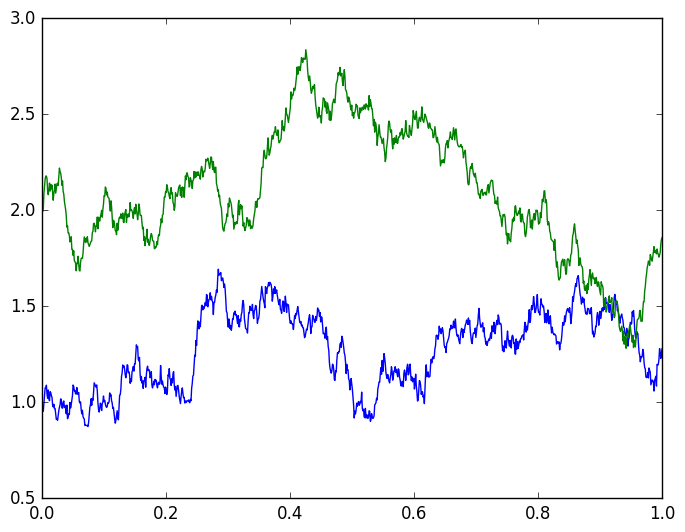

In [3]:
let t=linspace(0, 1, 1000), d = cumsim(BrownianMotion([1, 2]), t)
    plot(t, d[:,1])
    plot(t, d[:,2])
end;

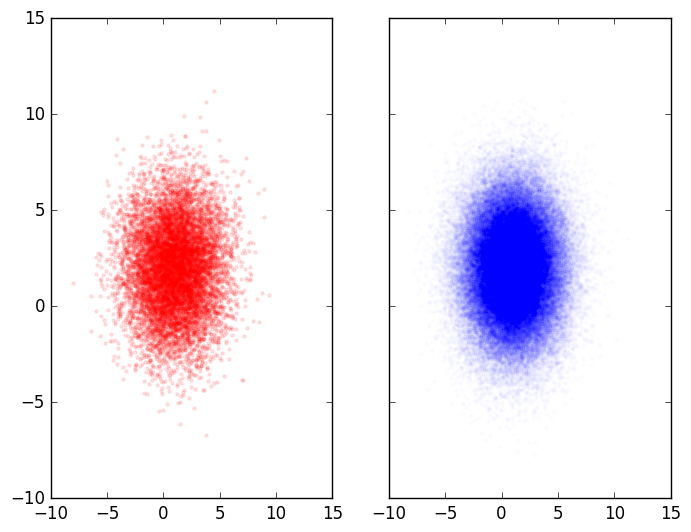

In [8]:
let t=linspace(0, 5, 10000), p=BrownianMotion([1, 2]), d = sim(p, t, 10000)
    fig, axis = subplots(1, 2, sharey=true)

    axis[1][:scatter](x=d[1,:], y=d[2,:], alpha=.1, marker=".", color="red")
    #plot(quantile(distribution(p, t[end]), q(1)), label="1")
    #plot(quantile(distribution(p, t[end]), q(2)), label="2")
    #plot(quantile(distribution(p, t[end]), q(3)), label="3")
    d=rand(distribution(p, t[end]), 100000)
    axis[2][:scatter](x=d[1,:], y=d[2,:], alpha=.01, marker=".", color="blue")
end;

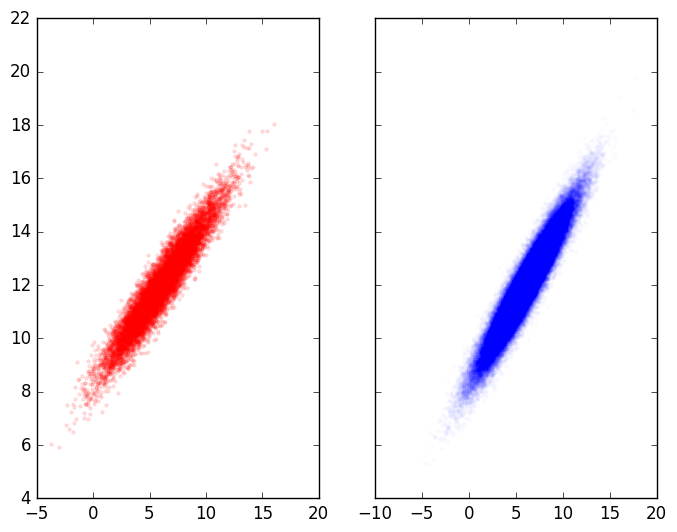

In [11]:
let t=linspace(0, 5, 10000), s = [1 0; .5 .5], p = BrownianMotionWithDrift([1, 2], s*s.', [1, 2]), d = sim(p, t, 10000)
    fig, axis = subplots(1, 2, sharey=true)
    axis[1][:scatter](x=d[1,:], y=d[2,:], alpha=.1, marker=".", color="red")
    #plt[:axis]("equal")
    #plot(quantile(distribution(p, t[end]), q(1)), label="1")
    #plot(quantile(distribution(p, t[end]), q(2)), label="2")
    #plot(quantile(distribution(p, t[end]), q(3)), label="3")
    legend()
    d=rand(distribution(p, t[end]), 100000)
    axis[2][:scatter](x=d[1,:], y=d[2,:], alpha=.01, marker=".", color="blue")
end;